# TMA4215 - Assignment 4 - The trapezoidal method

**Deadline:** Wednesday October 7, 11:59PM

**For approval:** Upload a Jupyter Notebook in Blackboard with code/answers. Answer Control questions in Blackboard.

**Problem 1.**

The Trapezoidal method for problems $y'=f(y)$ can be written in the form

$$
    u_{n+1} = u_n + \frac{h}{2}(f(u_n)+f(u_{n+1}))
$$

**(a)** Show how this method belongs both to the class of Runge-Kutta methods and the class of linear multistep methods, just by writing it down in the multistep format and give its Butcher tableaux as a Runge-Kutta method.

***Solution to (a)***

We will first write the Trapezoidal method as a multistep-method. The general multistep method is defined as 

$$
    \sum_{j = 0}^q \alpha_j u_{n+j} = h \sum_{j = 0}^q \beta_j f_{n+j}, \quad f_{n+j} = f(t_{n+j}, u_{n+j}), 
$$

where $\alpha_q = 1$ and $\alpha_0$ or $\beta_0$ is nonzero. The Trapezoidal method fits to this definition with coefficients $\alpha_1 = 1$, $\alpha_0 = -1$ and $\beta_1 = \frac{1}{2}$, $\beta_0 = \frac{1}{2}$, while the rest of the coefficients are zero.

It also belongs to the RK-methods, and its Butcher tableaux is given by 

$$
\begin{array}{c|rr}
0 & 0 & 0\\
1 & \frac12 & \frac12\\ \hline
        & \frac12 & \frac12
\end{array}
$$

since

$$
\begin{align*}
    k_1 &= f(t_n, u_n) \\
    k_2 &= f(t_n + h, u_n + \frac12h(k_1+k_2)) \\
    u_{n+1} &= u_n + \frac12h(k_1+k_2).
\end{align*}
$$



**(b)** Use the multistep format to derive an expression for the local truncation error of this method (it is sufficient to give the principal term). What is the order of this method?

***Solution to (b)***

The local error is defined as 

$$
    y_{n+k} - u_{n+k}, 
$$

where we assume that $u_{n+j} = y_{n+j}, \quad j = 0, \ldots, k-1$, where $u_{n+k}$ represents the approximate value and $y_{n+k}$ represents the exact value of the given problem at step $n+k$.

We define 

$$
\begin{align*}
    L(y, t, h) &= \sum_{i = 0}^k [\alpha_iy(t+ih) - h\beta_iy'(t+ih)] \\
    &= y(t+h) - y(t) - \frac{h}{2}(y'(t) + y'(t+h)), 
\end{align*}
$$

because the only nonzero coefficients in the Trapezoidal rule are $\alpha_1 = 1$, $\alpha_0 = -1$, $\beta_1 = \frac{1}{2}$ and $\beta_0 = \frac{1}{2}$.
The Trapezoidal method itself gives

$$
    u_{n+1} - \frac h2 f(u_{n+1}) - y_n - \frac h2 f(y_n) = 0,
$$

since we have assumed that $u_{n+j} = y_{n+j}$ for all steps prior to $k$. Adding and subtracting $y_{n+1} - \frac h2 f(y_{n+1})$ to this expression gives

$$
    L(y, t, h) = y_{n+1} - u_{n+1} + \frac h2(f(y_{n+1})-f(y_{n+1})).
$$

By Taylor expansion this gives

$$
    L(y, t, h) = (I - h \frac{\partial f}{\partial y}(\eta))(y_{n+1}-u_{n+1}), \quad \eta = \theta u_{n+1} + (1-\theta)y_{n+1}, \quad \theta \in (0,1).
$$

This leads to the local error 

$$
    y_{n+1}-u_{n+1} = (I - h \frac{\partial f}{\partial y}(\eta))^{-1}L(y, t, h).
$$

In the end, the local truncation error is given as

$$
\begin{align*}
    y_{n+1} - u_{n+1} &= L(y, t, h)(1 + \mathcal{O}(h)) \\
    &= [y(t+h) - y(t) - \frac{h}{2}(y'(t) + y'(t+h))](1+\mathcal{O}(h)) \\
    &= \mathcal{O}(h^2).
\end{align*}
$$

This means that the order of the local truncation error is $p = 1$. (THIS IS STILL WRONG. Something has gone wrong in the calculations). 
Taylor-expanding two of the terms in $L$ as 

$$
\begin{align*}
    y(t+h) &= y(t) + hy'(t) + \frac{h^2}{2}y''(t) + \mathcal{O}(h^3), \\
    hy'(t+h) &= hy'(t) + h^2y''(t) + \mathcal{O}(h^3),
\end{align*}
$$

gives $L(y, t, h) = \mathcal{O}(h^3)$, which means that the order of the method is $p = 2$. What I learned from this is that it is much easier to find the locar error for the LMM from $L(y,t,h)$ as we have defined it, using Taylor expansions, compared to running through the entire derivation above, which obviously has a high chance of leading to a mistake.  

Want to find the order of the method. The two polynomials $\rho (z)$ and $\sigma (z)$ are given by

$$
    \rho (z) = z - 1,
$$
and
$$
    \sigma (z) = \frac12 z + \frac12.
$$

Now, check the order in the following way

$$
    \begin{align*}
        q &= 0: \quad \sum_{i = 0}^1 \alpha_i = 1 - 1 = 0 \\
        q &= 1: \quad \sum_{i = 0}^1 i \alpha_i - 1 \cdot \sum_{i = 0}^1 \beta_i = 1 - (\frac{1}{2} + \frac{1}{2}) = 0 \\
        q &= 2: \quad \sum_{i = 0}^1 i^2 \alpha_i - 1 \cdot 2\sum_{i = 0}^1 i\beta_i = 1 - 1\cdot \frac22 = 0. \\
        q &= 3: \quad \sum_{i = 0}^1 i^3 \alpha_i - 1 \cdot 3\sum_{i = 0}^1 i^2\beta_i = 1 - \frac32 = -\frac12 \neq 0
    \end{align*}
$$

This suggests that the order of the method is $p = 2$, which is consistent with the answer found from $L(y,t,h)$.

**Control question 1.** what is the order of the method.

**Control question 2.** What is $a_{2,2}$ in the Butcher tableaux.

**(c)** Consider again the trapezoidal method above. Assume that $f$ has a Lipschitz constant $L$. We denote as usual the sequence of computed approximations by $u_1, u_2,\ldots$. At some grid point, $t=t_n$,
let the exact solution be $y(t_n)=y_n$ and assume that the trapezoidal rule applied to the starting value $y_n$ would result in an approximation $w_{n+1}$ at $t_{n+1}$. The difference $y_{n+1}-w_{n+1}$ is the local error and we assume that $\|y_{n+1}-w_{n+1}\|\leq Mh^{p+1}$ for a constant $M>0$ and a positive integer $p$.
Clearly we can write for the global error at $t_{n+1}$

$$
E_{n+1} := y_{n+1}-u_{n+1}= (y_{n+1}-w_{n+1})+(w_{n+1}-u_{n+1}) = \text{loc.err.} + (w_{n+1}-u_{n+1})
$$

Let us focus on the second term of the right hand side, show that

$$
\|w_{n+1}-u_{n+1}\| \leq \frac{1+\frac12 hL}{1-\frac12 hL} \|E_n\|
$$

Use this result to derive a bound for the global error $E_n$ at $t=t_n$ as a function of $h$, $L$, and $M$ for the trapezoidal rule.

***Solution to (c)***

First, we want to show that 

$$
\|w_{n+1}-u_{n+1}\| \leq \frac{1+\frac12 hL}{1-\frac12 hL} \|E_n\|.
$$

This is shown by utilizing the Lipschitz-property of $f$ and the triangle inequality for norms along the way

$$
\begin{align*}
    \|w_{n+1} - u_{n+1}\| &= \|y_n - u_n + \frac h2(f(y_n)-f(u_n)) + \frac h2(f(w_{n+1})-f(u_{n+1}))\| \\
    &\leq \|y_n - u_n\| + \frac h2\|f(y_n) - f(u_n)\| + \frac h2\|f(w_{n+1})-f(u_{n+1})\| \\
    &\leq \|E_n\| + \frac h2 L\|y_n - u_n\| + \frac h2 L\|w_{n+1} - u_{n+1}\| \\
    &= \|E_n\|(1+\frac h2L) +  \frac h2 L\|w_{n+1} - u_{n+1}\|.
\end{align*}
$$

By moving the terms around, the inequality has been shown. 

Now, we want to find a bound for the global error $E_n$.

$$
\begin{align*}
    \|E_{n+1}\| &= \|y_{n+1}-w_{n+1}+w_{n+1}-u_{n+1}\| \\
    &\leq \|y_{n+1}-w_{n+1}\| + \|w_{n+1}-u_{n+1}\| \\
    &\leq Mh^{p+1} + \frac{1+\frac12 hL}{1-\frac12 hL} \|E_n\|.
\end{align*}
$$

Next, this recursive formula needs to be solved. The solution is

$$
\begin{align*}
    \|E_n\| &\leq \left(\frac{1+\frac12 hL}{1-\frac12 hL}\right)^n\|E_0\| + \sum_{k = 0}^{n-1}\left(\frac{1+\frac12 hL}{1-\frac12 hL}\right)^k \cdot Mh^{p+1} \\ \\
    &= \left(\frac{1+\frac12 hL}{1-\frac12 hL}\right)^n\|E_0\| + \frac{\left(\frac{1+\frac12 hL}{1-\frac12 hL}\right)^n - 1}{\left(\frac{1+\frac12 hL}{1-\frac12 hL}\right) - 1} \cdot Mh^{p+1}
\end{align*}
$$

This can be simplified further by using the fact that the Taylor series of the exponential function gives $ 1 + x < e^x$ for $x > 0$, which gives

$$
\begin{align*}
    \|E_n\| &\leq \left(\frac{e^{1/2hL}}{e^{-1/2hL}}\right)^n\|E_0\| + \frac{\left(\frac{e^{1/2hL}}{e^{-1/2hL}}\right)^n - 1}{\left(\frac{e^{1/2hL}}{e^{-1/2hL}}\right) - 1} \cdot Mh^{p+1} \\ \\
    &= e^{nhL}\|E_0\| + \frac{e^{nhL}-1}{e^{hL}-1}Mh^{p+1}.
\end{align*}
$$

Finally, one could make the exchange $hn = x_n - x_0$, which gives

$$
\begin{align*}
    \|E_n\| &\leq e^{(x_n - x_0)L}\|E_0\| + \frac{e^{(x_n - x_0)L}-1}{e^{hL}-1}Mh^{p+1} \\
   &\leq e^{(x_n - x_0)L}\|E_0\| + \frac{M}{L}(1+\frac{hL}{2})(e^{(x_n - x_0)L}-1)h^{p},
\end{align*}
$$

since $(\frac{1+\frac12 hL}{1-\frac12 hL}-1)^{-1} = \frac{1-\frac{hL}{2}}{hL}$
  

**Problem 2.**

Consider the nonlinear pendulum problem

$$
\ddot{q} = - \sin q
$$

where $\ddot{q}=\frac{d^2q}{dt^2}$ (and similarly $\dot{q}=\frac{dq}{dt}$ etc).
Rewritten as a first order system

\begin{align*}
   \dot{q} &= p \\
   \dot{p} &= -\sin q
\end{align*}

You should now compare two methods applied to this problem, the first one is the Euler method.

\begin{align*}
q_{n+1} &= q_n + h p_n \\
p_{n+1} &= p_n - h \sin q_n
\end{align*}

The second is the symplectic Euler method

\begin{align*}
q_{n+1} &= q_n + h p_n \\
p_{n+1} &= p_n - h \sin q_{n+1}
\end{align*}

Write some python code which does the following (need not be general functions, the main goal is now just to produce two plots as specified below for the pendulum problem)

1. With intial values $q_0=1, p_0=0$, implement $N$ steps of both the Euler and symplectic Euler methods that takes you from $t=0$ to $t=T$ with stepsize $h$. Assume $T$ and $N$ specified, and set $h=T/N$. Store the whole history of approximations $(q_n,p_n),\ n=0,\ldots,N$ in a $(2,N)$ numpy array.
2. Run an experiment with $N=1000$ and $T=30$ (both methods).
3. Make two phase plots, i.e. plot $p_n$ vs $q_n$, for each of the two methods. Draw them as continuous lines and plot the initial point as a circle (or bullet).

**Control question 3.** For the Euler method, does the method produce (a) a closed curve (b) a curve that spirals inwards (decreasing radius) or (c) a curve that spirals outwards (increasing radius)


**Control question 4.** For the symplectic Euler method, does the method produce (a) a closed curve (b) a curve that spirals inwards (decreasing radius) or (c) a curve that spirals outwards (increasing radius)


It is apparent that the spiral spirals outwards in the Euler method (increasing radius).
It is apparent that the spiral is a closed curve, with constant radius, when using the symplectic Euler method.


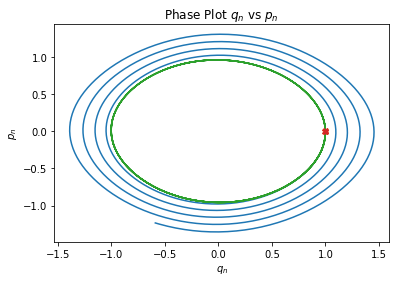

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N=1000
T=30
h=T/N
q0=1
p0=0
y0 = np.array([q0, p0])

def f(y):
    return np.array([y[1], -np.sin(y[0])])

class Sim: 
    
    def __init__(self, N, T, h, y0, f):
        self.N = N
        self.T = T
        self.h = h
        self.y0 = y0
        self.f = f
        self.history = np.zeros((2, self.N))
        self.history[:, 0] = y0
        self.y = y0 # Used to shift the y in the steps. 
        
    def euler_step(self):
        return self.y + self.h*self.f(self.y)

    def symplectic_euler_step(self):
        """Should probably generalize this somehow later!"""
        q1 = self.y[0] + self.h*self.y[1]
        p1 = self.y[1] - self.h*np.sin(q1)
        return np.array([q1, p1])

    def run_euler(self):
        for t in range(1, self.N):
            self.history[:, t] = self.euler_step()
            self.y = self.history[:, t]
        
        return self
    
    def run_symp_euler(self):
        for t in range(1, self.N):
            self.history[:, t] = self.symplectic_euler_step()
            self.y = self.history[:, t]
            
        return self
    
    def phase_plot(self):
        plt.plot(self.history[0, :], self.history[1, :])
        plt.title("Phase Plot $q_n$ vs $p_n$")
        plt.xlabel("$q_n$")
        plt.ylabel("$p_n$")
        plt.plot(self.y0[0], self.y0[1], marker = "X")
        #plt.show()
        
sim_euler = Sim(N, T, h, y0, f)
sim_symp_euler = Sim(N, T, h, y0, f)

sim_euler.run_euler()
sim_symp_euler.run_symp_euler()

sim_euler.phase_plot()
sim_symp_euler.phase_plot()

print("It is apparent that the spiral spirals outwards in the Euler method (increasing radius).")
print("It is apparent that the spiral is a closed curve, with constant radius, when using the symplectic Euler method.")